# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [53]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [54]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

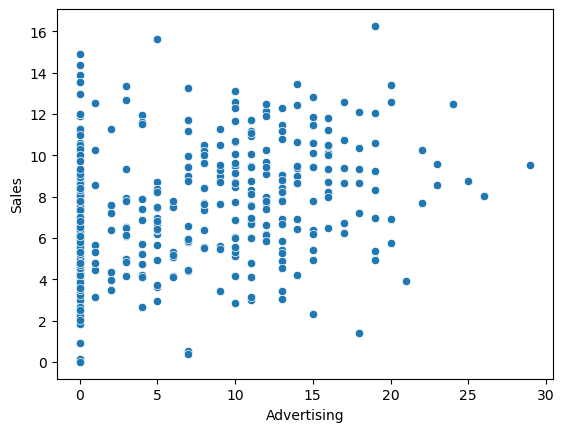

In [55]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

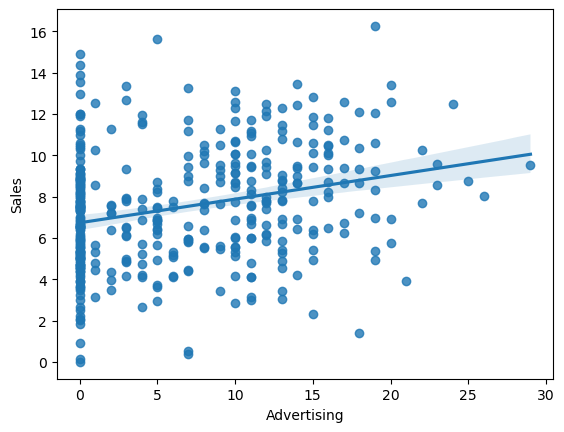

In [56]:
sns.regplot(x=var, y = target, data = data)
plt.show()

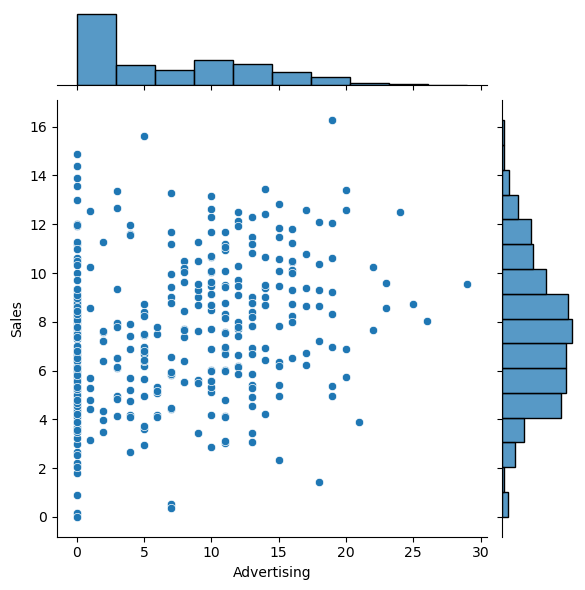

In [57]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [58]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

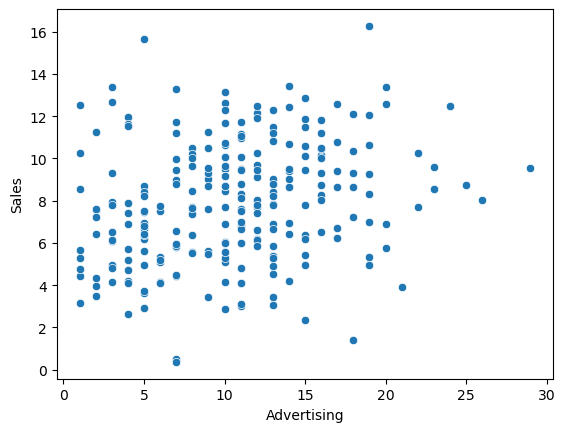

In [59]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [60]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.11267288308643e-05


In [62]:
def func(var, target):
    plt.figure(figsize=(12,6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var, y=target, data=data)

    plt.subplot(1, 2, 2)
    sns.regplot(x=var, y=target, data=data)

    plt.tight_layout()
    plt.show()

### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

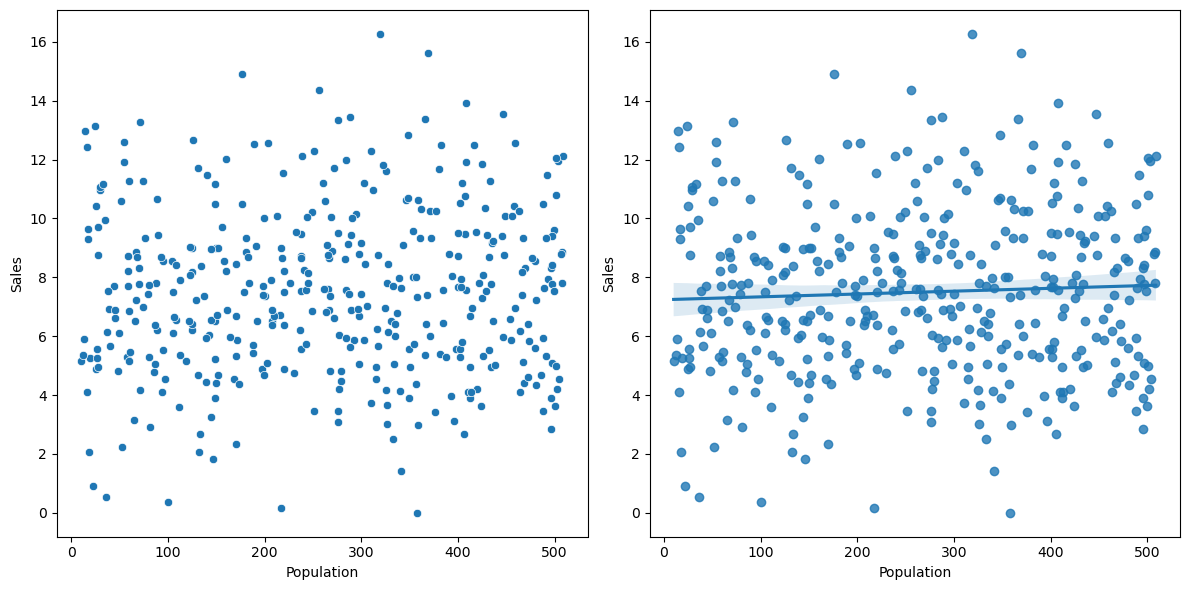

In [63]:
var = 'Population'
func(var, target)

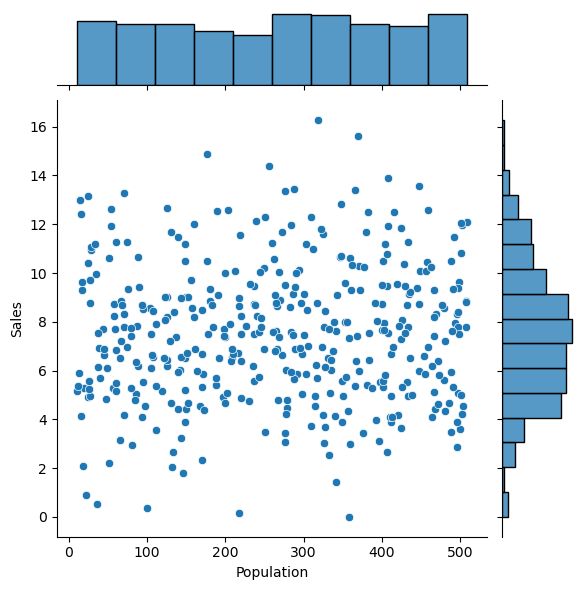

In [64]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [65]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 인구의 증가와 판매량의 변화는 관계가 크지 않다고 말할 수 있다.
- 하지만 추가 분석이 더 필요하다
- 인구수 자체가 판매량의 변화와 관계가 없다면, 이 제품을 필요로 하는 연령대는 어디일까? 해당 연령대에서의 판매량을 어떨까? 등 추가 분석이 필요
- p-value < 0.05 이므로 대립가설을 채택할 수 있지만, 매우 강한 영향이 있다고 보기 힘들다

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

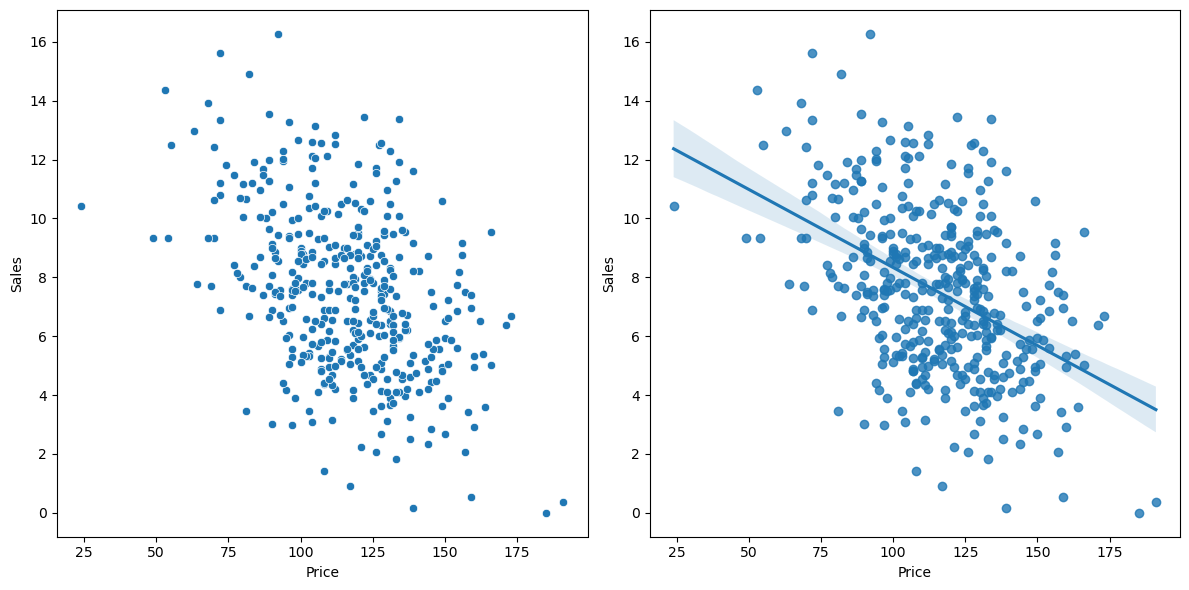

In [66]:
var = 'Price'
func(var, target)

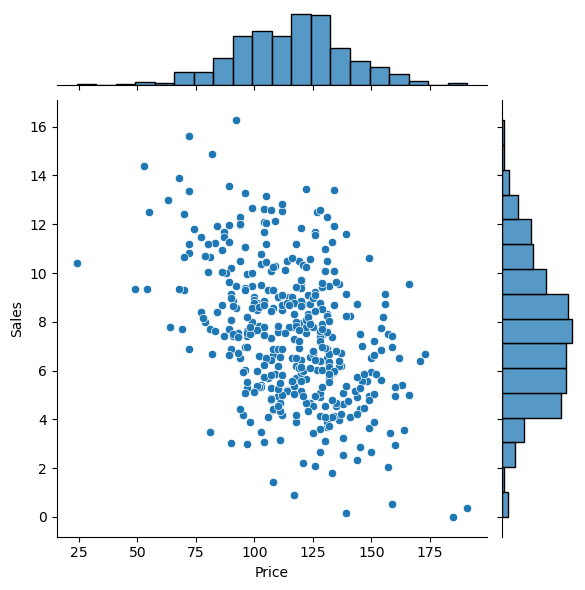

In [67]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [68]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 가격과 판매량은 중간 정도의 반비례 상관관계를 갖는다.
- p-value를 확인했을 때, '가격은 판매량과 관련이 있다'고 말할 수 있다.

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

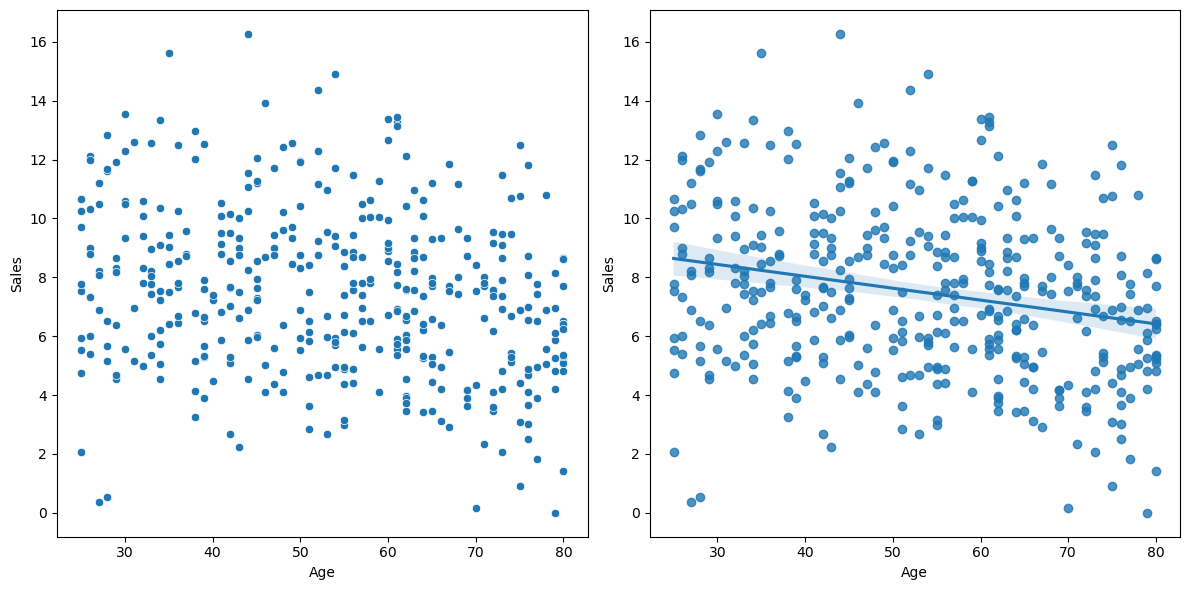

In [69]:
var = 'Age'
func(var, target)

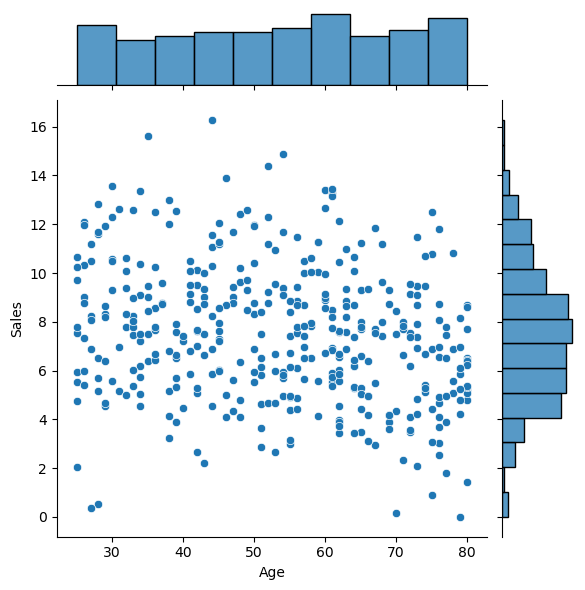

In [70]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [71]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.2318154396045765, p-value : 2.7889498393711916e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 나이와 판매량은 큰 관계가 있다고 보기 힘들다.
- 여기서 끝나면 안되고, 나이 자체와 큰 관계가 없다면, 연령대별 판매량은 어떨지? 추가 분석이 필요하다

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

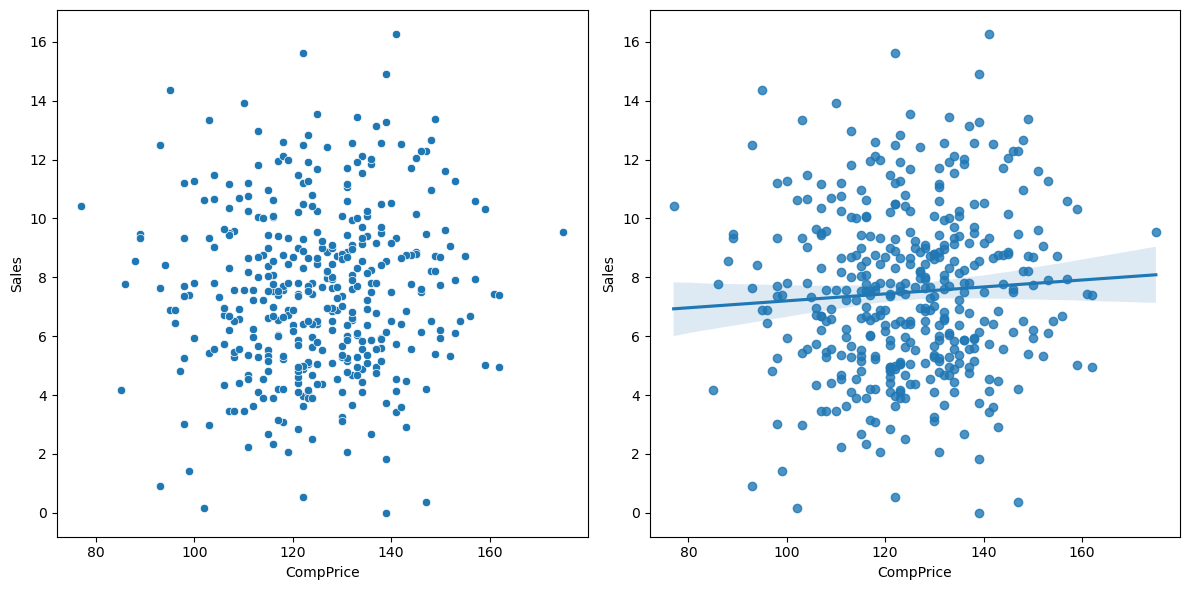

In [84]:
var = 'CompPrice'
func(var, target)

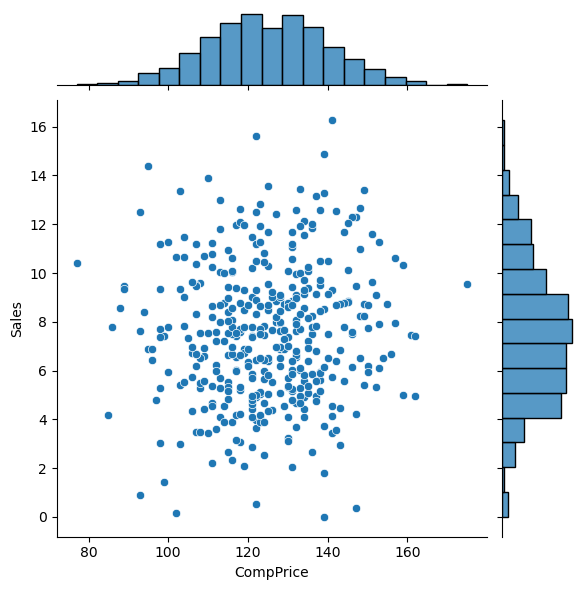

In [85]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [86]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수를 보면 '경쟁사 가격은 판매량과 큰 관련이 없다'고 나왔지만, p-value는 0.05보다 크기 때문에 유의 수준을 만족하지 못한다.
- 하지만 경쟁사 가격이 정말 자사 제품 판매량과 관련이 없을까..? 생각해봐야 한다.
- 소비자들은 제품을 선택할 때, 비슷한 품질의 제품군 중에서 가격이 더 저렴한 것을 선택하게 되어있다. 
- 때문에 경갱사 가격 자체를 바라볼 게 아니라, 경쟁사 가격과 자사 제품 가격의 차이에 따른 경향을 살펴봐야 하지 않을까..?

In [87]:
data['Price_diff'] = data['CompPrice'] - data['Price']
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,Price_diff
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


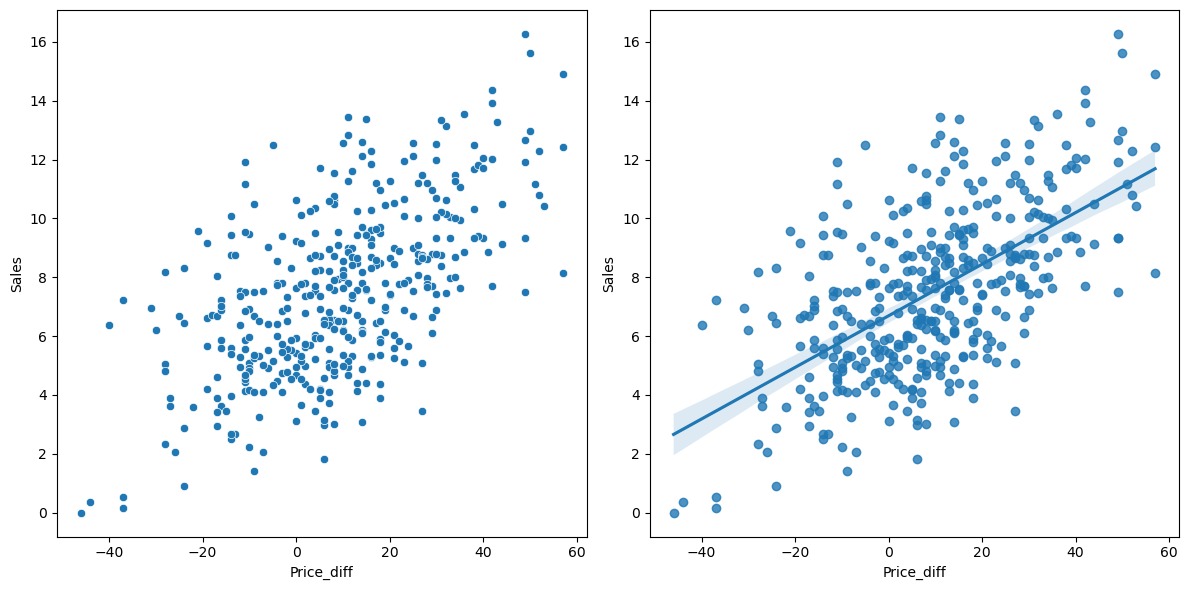

In [88]:
var = 'Price_diff'
func(var, target)

In [89]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.5979217124533921, p-value : 3.877120641788835e-40


- 경쟁사 가격 자체는 의미가 없지만, 가격 경쟁력으로 비교할 때에는 강한 상관관계를 보인다.

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

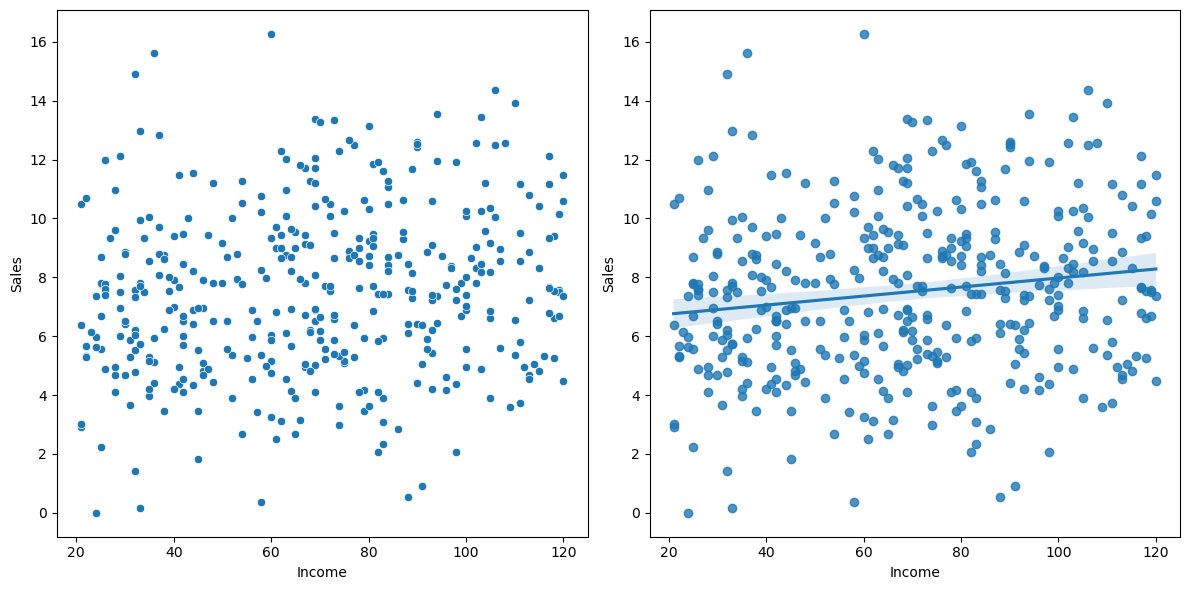

In [90]:
var = 'Income'

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=var, y=target, data=data)

plt.subplot(1, 2, 2)
sns.regplot(x=var, y=target, data=data)

plt.tight_layout()
plt.show()

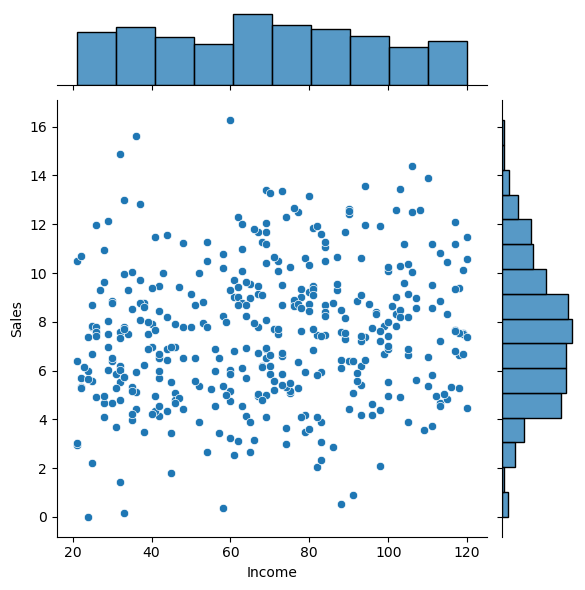

In [91]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [92]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517627


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 유의수준은 낮지만, 상관계수를 보아 '수입과 판매량과 큰 관계가 없다'고 말할 수 있다.

## **3.범주형 X --> Y**

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

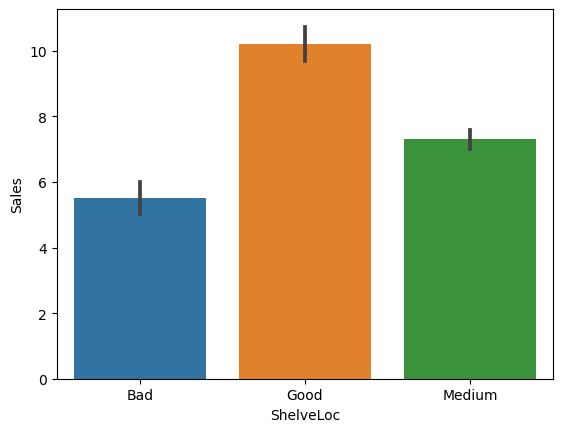

In [50]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [51]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

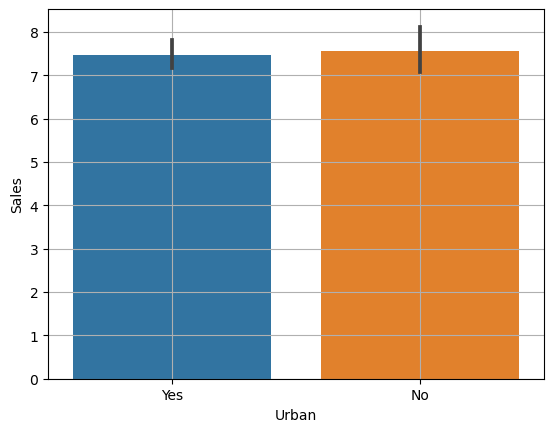

In [79]:
var = 'Urban'

sns.barplot(x=var, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [80]:
data['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
u1 = data.loc[data['Urban'] == 'Yes', 'Sales']
u2 = data.loc[data['Urban'] == 'No', 'Sales']
spst.ttest_ind(u1, u2)

Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 관련이 전혀 없다!

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

In [82]:
data['US'].unique()

array(['Yes', 'No'], dtype=object)

2) 수치화 : t-test, anova

In [83]:
us1 = data.loc[data['US'] == 'Yes', 'Sales']
us2 = data.loc[data['US'] == 'No', 'Sales']
spst.ttest_ind(us1, us2)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 관계가 조금 있다!

## **4.관계 정리하기**

① 강한관계

In [93]:
# Price, Price_diff, SelveLoc

② 중간관계

In [94]:
# Advertising, Age, Income, US

③ 관계없음

In [95]:
# Population, CompPrice, Urban